In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [4]:
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [0]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

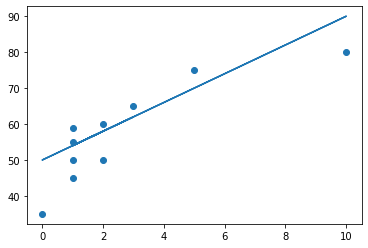

In [10]:
plt.scatter(X[1,:], y)
plt.plot(X[1,:], 50 + 4*X[1,:])

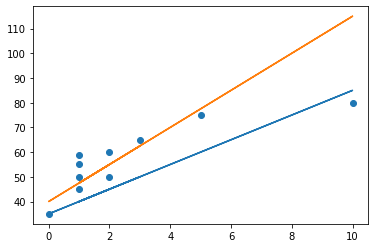

In [11]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)

In [0]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [13]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

In [0]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)

In [15]:
err1, err2

(9.4, -2.1)

In [0]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))

In [18]:
mae_1, mae_2

(10.4, 7.9)

In [0]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

In [20]:
mse_1, mse_2

(143.6, 151.35)

Метод наименьших квадратов

In [21]:
X.shape

(2, 10)

In [22]:
X.T.shape

(10, 2)

In [0]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([47.23214286,  3.91071429])

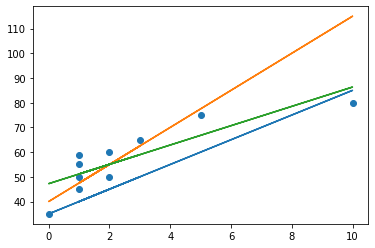

In [0]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])

In [0]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [0]:
calc_mse(y, y_pred1)

143.6

In [0]:
def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

In [0]:
calc_mae(y, y_pred1)

10.4

In [0]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [0]:
calc_mse(y, y_pred3)

45.93750000000002

In [0]:
calc_mae(y, y_pred3)

6.182142857142859

Градиентный спуск

In [0]:
n = 10
f = 1/n * np.sum((W[0] * X[0] - y)**2)

In [0]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [0]:
W[0] - g


7.384623655590011

1. Подберите скорость обучения (alpha) и количество итераций:

In [0]:
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.0001)

In [0]:
for i in range(1000):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
  if i % 100 == 0:
    print(i, W, err)

0 [1.01102 0.534  ] 3173.15
100 [2.02168794 3.452835  ] 2207.6942101483005
200 [2.88306663 5.58962851] 1670.7027004086372
300 [3.63289519 7.14848061] 1368.0832412796256
400 [4.29908617 8.28027926] 1193.7493344933293
500 [4.90228732 9.09657298] 1089.714750358689
600 [5.45777535 9.67982684] 1024.2828984889416
700 [ 5.97685612 10.0910047 ] 980.1260644155933
800 [ 6.46789973 10.37517467] 947.770026039189
900 [ 6.93710574 10.56565326] 922.0330206910178


*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [0]:
for i in range(1000):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
  W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
  if i % 100 == 0:
    print(i, W, err)

0 [ 7.39000543 10.69151537] 900.0794345405571
100 [ 7.82926291 11.13077285] 880.3833200630097
200 [ 8.11878108 11.42029102] 871.8268647349327
300 [ 8.30960485 11.61111479] 868.1097393158641
400 [ 8.43537835 11.7368883 ] 866.494932617143
500 [ 8.51827669 11.81978663] 865.7934226113582
600 [ 8.57291566 11.8744256 ] 865.4886701672382
700 [ 8.60892865 11.91043859] 865.3562785385644
800 [ 8.6326651  11.93417504] 865.2987645015771
900 [ 8.64830999 11.94981993] 865.2737790513362
